In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi
exp = np.exp
log = np.log
sqrt = np.sqrt
sin = np.sin
cos = np.cos

# Chapter 5<br>Numerical Differentiation and Integration

## 5.3 Romberg Integration

In [3]:
def romberg(f, a, b, n):
    h = b - a
    R = np.zeros((n, n))
    R[0, 0] = (f(a) + f(b))*h/2
    
    for j in range(1, n):
        h /= 2
        R[j, 0] = R[j-1, 0]/2 + sum([f(a + (2*k+1)*h) for k in range(2**(j-1))])*h
        for k in range(0, j):
            R[j, k+1] = ((4**(k+1)*R[j, k] - R[j-1, k])) / (4**(k+1) - 1)
    
    return R

### Q. 1

In [4]:
# (a)
a, b = 0, 4

def f(x):
    return x / sqrt(x**2 + 9)

true_integral = 2
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [5]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 2.000000
Error: 0.000000


In [6]:
# (b)
a, b = 0, 1

def f(x):
    return x**3 / (x**2 + 1)

true_integral = (1 - log(2))/2
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [7]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 0.153426
Error: 0.000000


In [8]:
# (c)
a, b = 0, 1

def f(x):
    return x*exp(x)

true_integral = 1
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [9]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 1.000000
Error: 0.000000


In [10]:
# (d)
a, b = 1, 3

def f(x):
    return (x**2)*log(x)

true_integral = 9*log(3) - 26/9
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [11]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 6.998622
Error: 0.000000


In [12]:
# (e)
a, b = 0, pi

def f(x):
    return (x**2)*sin(x)

true_integral = pi**2 - 4
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [13]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 5.869605
Error: 0.000000


In [14]:
# (f)
a, b = 2, 3

def f(x):
    return x**3 / sqrt(x**4 - 1)

true_integral = (sqrt(80) - sqrt(15))/2
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [15]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 2.535644
Error: 0.000000


In [16]:
# (g)
a, b = 0, 2*sqrt(3)

def f(x):
    return 1 / sqrt(x**2 + 4)

true_integral = log(2 + sqrt(3))
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [17]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 1.316958
Error: 0.000000


In [18]:
# (h)
a, b = 0, 1

def f(x):
    return x / sqrt(x**4 + 1)

true_integral = log(1 + sqrt(2)) / 2
romberg_integral = romberg(f, a, b, 5)[-1, -1]
error = abs(true_integral - romberg_integral)

In [19]:
print("Romberg integration: %f" % romberg_integral)
print("Error: %f" % error)

Romberg integration: 0.440687
Error: 0.000000


### Q. 2

In [20]:
# (a)
a, b = 0, 1

def f(x):
    return exp(x**2)

In [21]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 6 / Romberg integration: 1.462652


In [22]:
# (b)
a, b = 0, sqrt(pi)

def f(x):
    return sin(x**2)

In [23]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 7 / Romberg integration: 0.894831


In [24]:
# (c)
a, b = 0, pi

def f(x):
    return exp(cos(x))

In [25]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 8 / Romberg integration: 3.977463


In [26]:
# (d)
a, b = 0, 1

def f(x):
    return log(x**2 + 1)

In [27]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 6 / Romberg integration: 0.263944


In [28]:
# (e)
a, b = 0, 1

def f(x):
    return x / (2*exp(x) - exp(-x))

In [29]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 7 / Romberg integration: 0.161020


In [30]:
# (f)
a, b = 0, pi

def f(x):
    return cos(exp(x))

In [31]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 11 / Romberg integration: -0.375940


In [32]:
# (g)
a, b = 0, 1

def f(x):
    return x**x

In [33]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 14 / Romberg integration: 0.783431


In [34]:
# (h)
a, b = 0, pi/2

def f(x):
    return log(cos(x) + sin(x))

In [35]:
n = 5
while True:
    R = romberg(f, a, b, n)
    if abs(R[-2, -2] - R[-1, -1]) < 5 * 10**(-9):
        break
    n += 1

print("n: %d / Romberg integration: %f" % (n, R[-1, -1]))

n: 7 / Romberg integration: 0.371569


### Q. 3

In [36]:
a, b = 1, 2
f = log
true_integral = 2*log(2) - 1

In [37]:
# (a)
h_range = np.array([(b - a)/2**i for i in range(10)])
second_column = romberg(log, a, b, 10)[:, 1]
error_range = abs(true_integral - second_column)

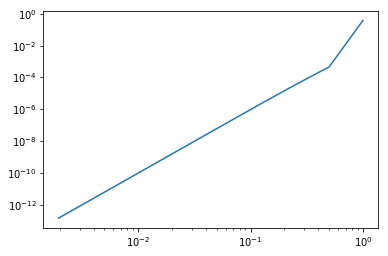

In [38]:
plt.plot(h_range, error_range)
plt.xscale("log")
plt.yscale("log")

plt.show()

In [39]:
print("Computational slope: %f" % ((log(error_range[-1]) - log(error_range[-2]))/(log(h_range[-1]) - log(h_range[-2]))))
print("Theoretical slope: %f" % 4)

Computational slope: 3.999682
Theoretical slope: 4.000000


In [40]:
# (b)
h_range = np.array([(b - a)/2**i for i in range(10)])
third_column = romberg(log, a, b, 10)[:, 2]
error_range = abs(true_integral - third_column)

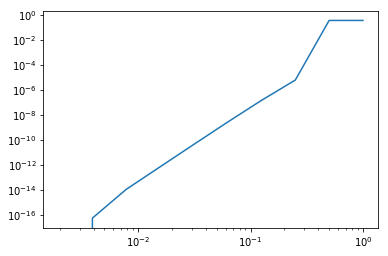

In [41]:
plt.plot(h_range, error_range)
plt.xscale("log")
plt.yscale("log")

plt.show()

In [42]:
print("Computational slope: %f" % ((log(error_range[-3]) - log(error_range[-4]))/(log(h_range[-3]) - log(h_range[-4]))))
print("Theoretical slope: %f" % 6)

Computational slope: 5.991045
Theoretical slope: 6.000000
